In [1]:
# dataset

# twin births in the US 1989-1991

# birthweight of the twin0 twin1
# mortality outcome for twin0 twin1

# 50 health related features about the mother of the twins

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import graphviz as gr
import os

def twins_data():
    twin_pairs_dfs = []

    for file in os.listdir('../data/'):
        if 'twin_pairs' in file:
            df = pd.read_csv(f"../data/{file}")
            unwanted_columns = [col for col in df.columns if 'Unnamed' in col]
            df.drop(columns=unwanted_columns,inplace=True)
            twin_pairs_dfs.append(df)

    df = pd.concat(twin_pairs_dfs, axis=1)

    return df


In [2]:
df = twins_data()

In [5]:
df.head(1)

,dbirwt_0,dbirwt_1,mort_0,mort_1,pldel,birattnd,brstate,stoccfipb,mager8,ormoth,...,feduc6,infant_id_0,infant_id_1,dlivord_min,dtotord_min,bord_0,bord_1,brstate_reg,stoccfipb_reg,mplbir_reg
0,2268.0,2296.0,0.0,0.0,1.0,1.0,1,1,3,0.0,...,NaN,1,0,NaN,NaN,NaN,NaN,5,5,1.0


In [ ]:
# combined_birthweight as a function of risk factors of the mother AND smoking

# combined_birthweight is just a measure of infant health (dbwrt_0 + dbwrt_1)
# not a perfect measure
# 1. a newborn can be heavy but still unhealthy somehow
# 2. one of the two twins might be a ALOT heavier than the other - this would conceal that

# smoking (tobacco = 1 or 0 for smokes or does not)
# total of number of births before the current one 

# the setup above is somewhat contrived - because we want our regression to look a certain way
# there's a separate topic of - how do we determine the best variables to include in our regression
# but that is not our focus here

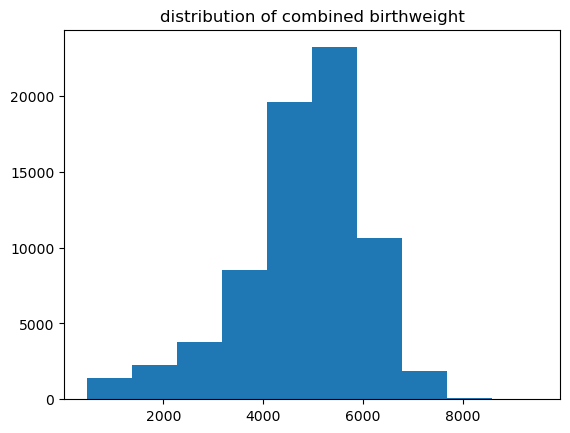

In [6]:
df['combined_birthweight'] = df['dbirwt_0'] + df['dbirwt_1']

plt.figure()
plt.hist(df['combined_birthweight'])
plt.title("distribution of combined birthweight")
plt.show()

In [10]:
df['tobacco'].value_counts(normalize=True)

tobacco
0.0    0.837035
1.0    0.162965
Name: proportion, dtype: float64

In [15]:
# othermr
df.isna().mean().sort_values(ascending=False)

cigar6                  0.276347
tobacco                 0.269872
drink5                  0.256766
alcohol                 0.251216
feduc6                  0.205747
orfath                  0.165702
dfageq                  0.155820
herpes                  0.148097
frace                   0.143808
uterine                 0.108207
dtotord_min             0.102572
dlivord_min             0.101254
bord_0                  0.101254
bord_1                  0.101254
incervix                0.099320
hydra                   0.099320
preterm                 0.099320
hemo                    0.099320
pre4000                 0.099320
rh                      0.070292
meduc6                  0.060817
renal                   0.059430
eclamp                  0.059430
phyper                  0.059430
othermr                 0.059430
chyper                  0.059430
anemia                  0.059430
diabetes                0.059430
lung                    0.059430
cardiac                 0.059430
adequacy  

In [16]:
var_types = {'adequacy': 'cat',
 'alcohol': 'bin',
 'anemia': 'bin',
 'birattnd': 'cat',
 'birmon': 'cyc',
 'bord': 'bin',
 'brstate': 'cat',
 'brstate_reg': 'cat', 
 'cardiac': 'bin',
 'chyper': 'bin',
 'cigar6': 'cat',
 'crace': 'cat',
 'csex': 'bin',
 'data_year': 'cat',
 'dfageq': 'cat',
 'diabetes': 'bin',
 'dlivord_min': 'ord',
 'dmar': 'bin',
 'drink5': 'cat',
 'dtotord_min': 'ord',
 'eclamp': 'bin',
 'feduc6': 'cat',
 'frace': 'cat',
 'gestat10': 'cat',
 'hemo': 'bin',
 'herpes': 'bin',
 'hydra': 'bin',
 'incervix': 'bin',
 'infant_id': 'index do not use',
 'lung': 'bin',
 'mager8': 'cat',
 'meduc6': 'cat',
 'mplbir': 'cat',
 'mpre5': 'cat',
 'mrace': 'cat',
 'nprevistq': 'cat',
 'orfath': 'cat',
 'ormoth': 'cat',
 'othermr': 'bin',
 'phyper': 'bin',
 'pldel': 'cat',
 'pre4000': 'bin',
 'preterm': 'bin',
 'renal': 'bin',
 'rh': 'bin',
 'stoccfipb': 'cat',
 'stoccfipb_reg': 'cat',
 'tobacco': 'bin',
 'uterine': 'bin'}

In [18]:
for var in var_types:
    if var_types[var] == 'ord':
        print(var)

dlivord_min
dtotord_min


In [28]:
df['total_number_of_births_before_twins'].value_counts().sort_values().sum()

64027

In [26]:
df['total_number_of_births_before_twins'].isna().sum()

7318

In [30]:
(df['total_number_of_births_before_twins'] == 0).sum()

0

In [29]:
(64027 + 7318) == df.shape[0]

True

In [31]:
1 - (df['total_number_of_births_before_twins'].value_counts().sort_values().sum()/df.shape[0])

0.10257200925082344

In [34]:
df['total_number_of_births_before_twins'].fillna(0,inplace=True)

In [22]:
# simple linear regression in one variable
# combined_birthweight ~ tobacco

result = smf.ols("combined_birthweight ~ tobacco",data = df[['combined_birthweight','tobacco']]).fit()
result.params

Intercept    4853.475575
tobacco      -391.497367
dtype: float64

In [ ]:
# predicted y = intercept + coefficient_x*x

# predicted combined_birthweight = 4853 - 391*tobacco{0,1}

# for someone who smokes, the combined birthweight prediction is

# 4462

# for someone who does not smoke, combined birthweight prediction is

# 4853

In [23]:
df[~df['tobacco'].isna()].groupby('tobacco')['combined_birthweight'].mean()

tobacco
0.0    4853.475575
1.0    4461.978207
Name: combined_birthweight, dtype: float64

In [24]:
df.rename(columns={'dtotord_min':'total_number_of_births_before_twins'}, inplace=True)

In [36]:
# regression number 2
# combined_birthweight ~ tobacco + total_number_of_births_before_twins

# regression columns list
regression_2_columns = ['combined_birthweight','tobacco','total_number_of_births_before_twins']

results = smf.ols("combined_birthweight ~ tobacco + total_number_of_births_before_twins",data = df[regression_2_columns]).fit()

results.params

Intercept                              4740.043471
tobacco                                -420.000603
total_number_of_births_before_twins      52.022326
dtype: float64

In [ ]:
# predicted y = intercept + coefficient_x1*x1 + coefficient_x2*x2

# predicted combined birthweight = 4740 - 420*tobacco + 52*total_number_of_births_before_twins

# smokers and non-smokers have a different line

